In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
df.duplicated("CustomerId").sum()

np.int64(0)

In [7]:
df = df.set_index('CustomerId')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Encoding

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_8448\1386099162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)


In [11]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.replace({'Gender':{"Male":0, "Female":1}}, inplace=True)

C:\Users\divya\AppData\Local\Temp\ipykernel_8448\3538318006.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{"Male":0, "Female":1}}, inplace=True)


In [13]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [14]:
df.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [15]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [16]:
df["Is Active Member"].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [17]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [18]:
df["Zero Balance"] = np.where(df["Balance"]>0, 1, 0)

<Axes: >

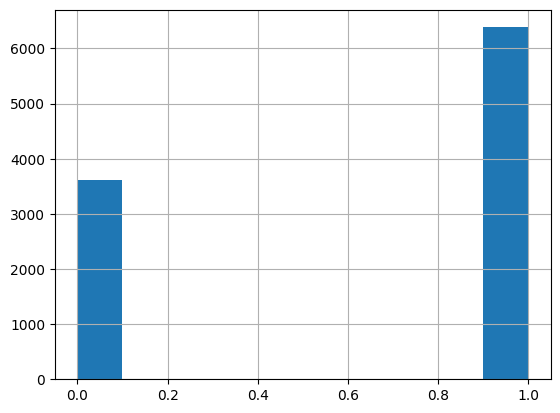

In [19]:
df["Zero Balance"].hist()

In [20]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Label and Features**

In [21]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [22]:
X = df.drop(["Surname",'Churn'],axis=1)
y = df["Churn"]

In [23]:
X.shape,y.shape

((10000, 11), (10000,))

**Random Over Sampling**

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [29]:
ros = RandomOverSampler(random_state=2529)

In [30]:
X_ros,y_ros = ros.fit_resample(X,y)

In [31]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [33]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [34]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

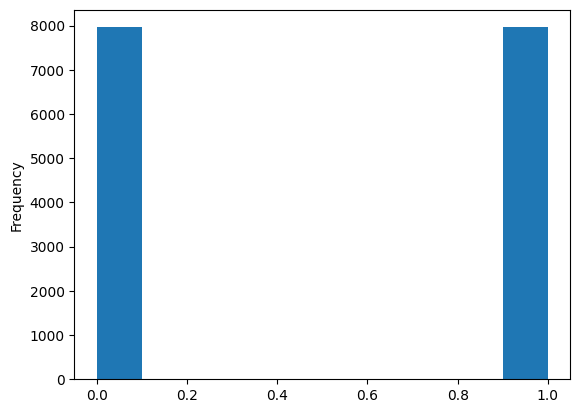

In [36]:
y_ros.plot(kind='hist')

**Train Test Split**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=2529)

**Standardize Features**

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']])

In [44]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']] = sc.transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products', 'Estimated Salary']])

**Support Vector Machine Classifier**

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()

In [47]:
svc.fit(X_train_ros, y_train_ros)

SVC()

In [48]:
y_pred = svc.predict(X_test_ros)

**Model Accuracy**

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
confusion_matrix(y_test_ros, y_pred)

array([[1204,  400],
       [ 370, 1212]])

In [51]:
print(classification_report(y_test_ros, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1604
           1       0.75      0.77      0.76      1582

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



**Hyperparameter Tuning**

In [52]:
from sklearn.model_selection import GridSearchCV    

In [53]:
param_grid = {'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf'],
                'class_weight':['balanced']}

In [54]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2 )
grid.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [55]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [56]:
grid_predictions = grid.predict(X_test_ros)

In [58]:
confusion_matrix(y_test_ros, grid_predictions)

array([[1402,  202],
       [  43, 1539]])

In [59]:
print(classification_report(y_test_ros, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1604
           1       0.88      0.97      0.93      1582

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186

